Reference: https://huggingface.co/facebook/detr-resnet-50

# Import Necessary Packages

In [4]:
import torch
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import DetrForObjectDetection, DetrImageProcessor
from transformers import DetrConfig

# Load the Model

In [5]:
config = DetrConfig.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", config=config)
model.eval()

config.json: 0.00B [00:00, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/mnt/nfs/workspace/courses/PyTorch/Building-Transformer-Models-with-PyTorch-2.0/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/mnt/nfs/workspace/courses/PyTorch/Building-Transformer-Models-with-PyTorch-2.0/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/mnt/nfs/workspace/courses/PyTorch/Building-Transformer-Models-with-PyTorch-2.0/.v

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

# Get Image from Internet

In [6]:
img = Image.open("tulip_field.png")
img = img.convert("RGB")


In [29]:
# Process the image

In [7]:
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
img_tensor = transform(img).unsqueeze(0)

# Perform the Prediction

In [8]:
with torch.no_grad():
    outputs = model(img_tensor)
target_sizes = torch.tensor([img.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]




# Plot the Prediction

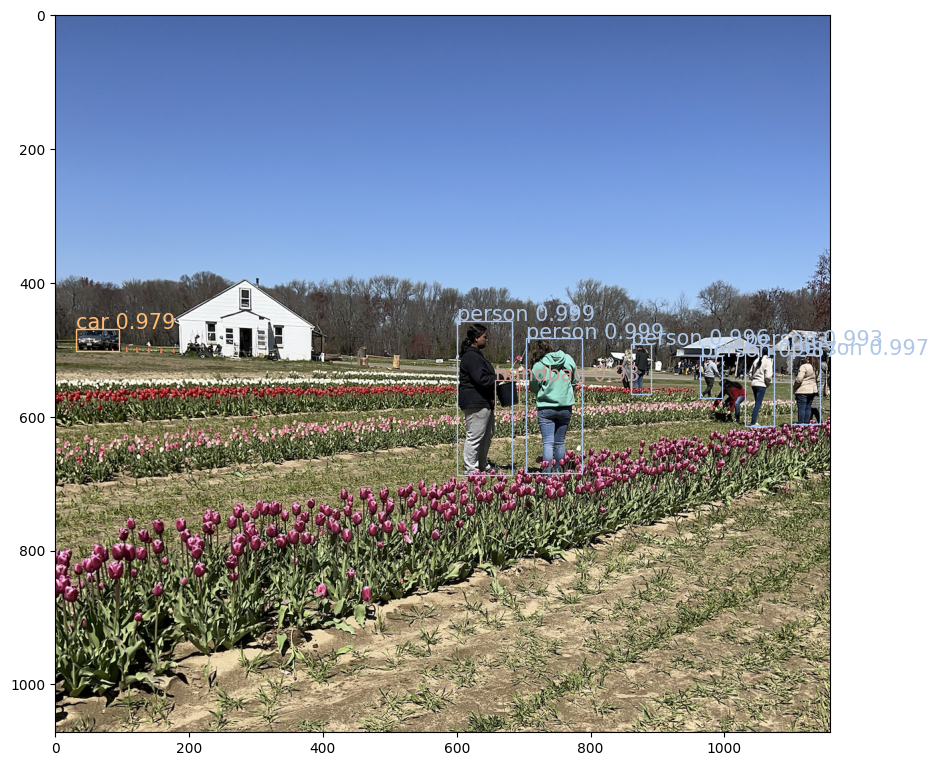

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img)

# is a qualitative colormap containing 20 distinct colors.
# These colors are then used in the visualization code to assign
# unique colors to different object categories detected in the image.
colors = plt.get_cmap("tab20").colors

# results["scores"] is prediction
# results["labels"] is true label
# results["boxes"] is the bounding box of object
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    x, y, w, h = box
    w = w - x
    h = h - y
    rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor=colors[label % 20], facecolor="none")
    ax.add_patch(rect)
    ax.text(x, y, f"{model.config.id2label[label.item()]} {round(score.item(), 3)}", fontsize=15, color=colors[label % 20])

plt.show()